In [1]:
%load_ext autoreload 
%autoreload 2
import torch
import numpy as np
import pandas as pd
from omegaconf import OmegaConf
from pathlib import Path
from pprint import pprint
from torch.utils import data
from tflearning.data.rotatedvisiondataset import RotatedVisionDataset
from ml_utilities.data.data_utils import show_images
from ml_utilities.data.datasetgenerator import DatasetGenerator

## Test RotatedVisionDataset

In [2]:
data_cfg = """
dataset: rotatedvision
dataset_kwargs:
  data_root_path: /system/user/beck/pwbeck/data
  dataset: mnist
  rotation_angle: 50
dataset_split:
  train_val_split: 0.9
"""
data_cfg = OmegaConf.create(data_cfg)

In [3]:
rot_vis_dataset = RotatedVisionDataset(**data_cfg.dataset_kwargs)

In [4]:
len(rot_vis_dataset)

60000

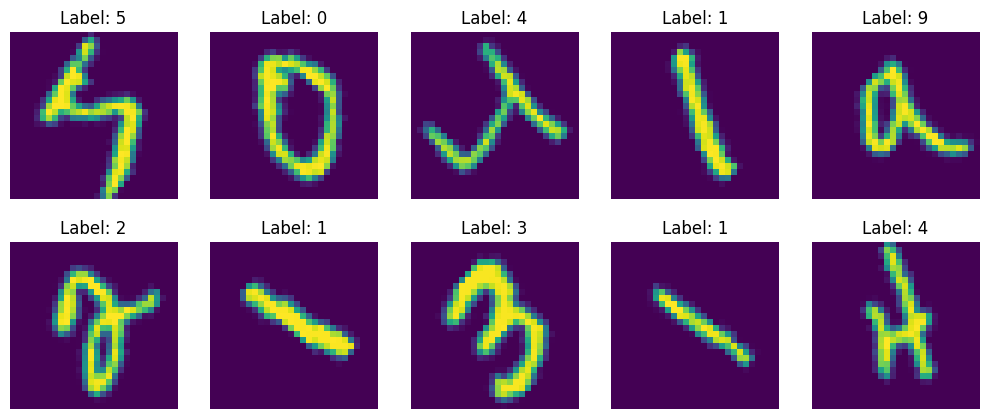

In [5]:
show_images(rot_vis_dataset, num_images=10, n_cols=5)

In [47]:
data_cfg2 = """
rot_angle: 50
data:
  dataset: mnist
  dataset_kwargs:
    data_root_path: /system/user/beck/pwbeck/data
  dataset_split:
    train_val_split: 0.9
  train_split_transforms:
    image_transforms:
    - RandomRotation:
        degrees: ${rot_angle}
        interpolation: 2 #bilinear
    tensor_transforms: null
    joint_tensor_transforms: null
  val_split_transforms:
    image_transforms:
    - RandomRotation:
        degrees: ${rot_angle}
        interpolation: 2 #bilinear
    tensor_transforms: null
    joint_tensor_transforms: null
    enable_transforms: true
""" 
data_cfg2 = OmegaConf.create(data_cfg2)

In [48]:
OmegaConf.resolve(data_cfg2)

In [49]:
data_cfg2.data.train_split_transforms.image_transforms[0]

{'RandomRotation': {'degrees': 50, 'interpolation': 2}}

/system/apps/userenv/beck/subspaces/lib/python3.10/site-packages/torchvision/transforms/transforms.py:1305: UserWarning: Argument 'interpolation' of type int is deprecated since 0.13 and will be removed in 0.15. Please use InterpolationMode enum.
  warnings.warn(


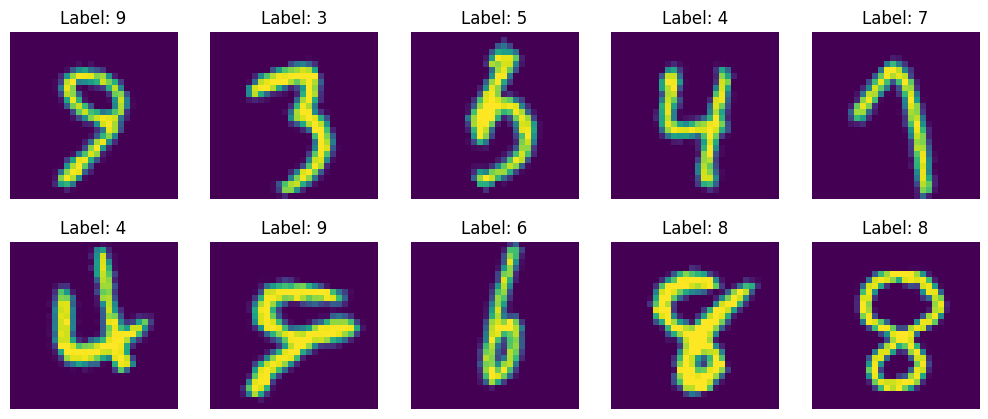

In [50]:
ds_gen = DatasetGenerator(**data_cfg2.data)
ds_gen.generate_dataset()
show_images(ds_gen.train_split, num_images=10, n_cols=5)

In [27]:
data_cfg2 = """
data:
  dataset: mnist
  dataset_kwargs:
    data_root_path: /system/user/beck/pwbeck/data
  dataset_split:
    train_val_split: 0.9
  train_split_transforms:
    image_transforms:
    - RandomRotation:
        degrees: 0
        interpolation: 2 #bilinear
    tensor_transforms: null
    joint_tensor_transforms: null
  val_split_transforms:
    image_transforms:
    - RandomRotation:
        degrees: 0
        interpolation: 2 #bilinear
    tensor_transforms: null
    joint_tensor_transforms: null
    enable_transforms: true
""" 
data_cfg2 = OmegaConf.create(data_cfg2)

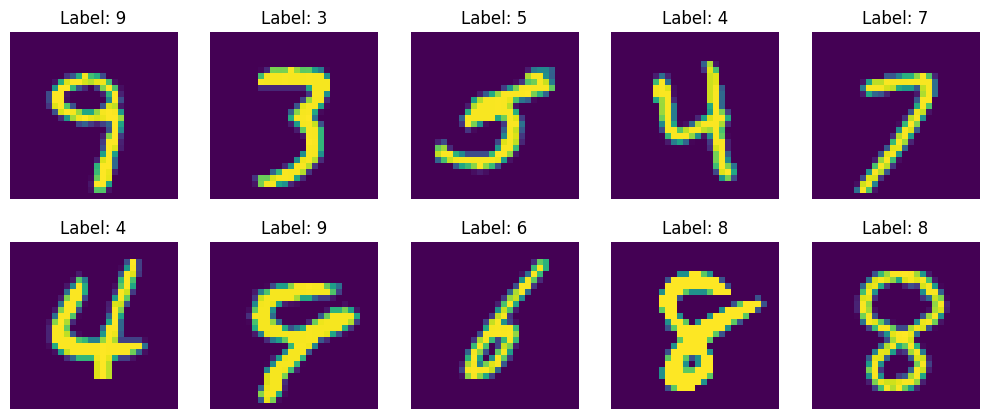

In [28]:
ds_gen = DatasetGenerator(**data_cfg2.data)
ds_gen.generate_dataset()
show_images(ds_gen.train_split, num_images=10, n_cols=5)